In [2]:
%load_ext autoreload
%autoreload 2

import pickle 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import axcgnss as axg


# Load files

In [3]:
# Load results 
folder_path = './.results/'
folder_path = './results_1000MC/results/'
df_results = pd.DataFrame()
for file in os.listdir(folder_path):
    if file.endswith(".pkl"):
        with open(os.path.join(folder_path, file), 'rb') as handle:
            _results = pickle.load(handle)
        _results = pd.DataFrame(_results)
        df_results = pd.concat([df_results, _results])


In [36]:
df_results

,run,prn,sampling_frequency,quantization,cn0_target_dB,sigma_noise,seed,scale_factor,delay_range,delay_step,...,axc_corr_mul8s_1KV6,axc_corr_mul8s_1KVM,axc_corr_mul8s_1KXF,axc_corr_mul8s_1L12,axc_corr_mul8s_1KV8,axc_corr_mul8s_1KV9,axc_corr_mul8s_1KVP,axc_corr_mul8s_1KVQ,axc_corr_mul8s_1KX5,axc_corr_mul8s_1KVA
0,0,1,10230000.0,16,20,226.163658,13228559,38.698021,200,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,10230000.0,16,20,226.163658,14510586,37.234508,200,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,10230000.0,16,20,226.163658,13817356,36.446683,200,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,10230000.0,16,20,226.163658,16041509,38.447375,200,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,10230000.0,16,20,226.163658,11192935,36.035701,200,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,995,1,8184000.0,8,55,3.597227,9686012,9.316506,200,1,...,"[4077.0, 3699.0, 783.0, -329.0, -1813.0, -571....","[4060.0, 3704.0, 752.0, -304.0, -1780.0, -532....","[4096.0, 3744.0, 736.0, -416.0, -2128.0, -784....","[2240.0, 3520.0, -320.0, 192.0, -1600.0, -448....","[-12320.0, -12720.0, -15600.0, -16768.0, -1826...","[-44720.0, -45216.0, -48016.0, -49240.0, -5067...","[-28216.0, -28624.0, -31568.0, -32568.0, -3396...","[-93584.0, -94048.0, -96928.0, -97776.0, -9886...","[-193056.0, -193600.0, -196128.0, -197056.0, -...","[-126592.0, -127232.0, -129824.0, -131120.0, -..."
7996,996,1,8184000.0,8,55,3.597227,15802561,9.056538,200,1,...,"[-883.0, 491.0, 2897.0, -369.0, 383.0, 1413.0,...","[-864.0, 500.0, 2924.0, -288.0, 456.0, 1492.0,...","[-728.0, 536.0, 2824.0, -424.0, 328.0, 1288.0,...","[-1344.0, -1600.0, 64.0, -2752.0, -3264.0, -21...","[-17300.0, -15916.0, -13528.0, -16848.0, -1608...","[-50064.0, -48664.0, -46280.0, -49728.0, -4893...","[-33600.0, -32240.0, -29784.0, -33016.0, -3225...","[-100272.0, -98816.0, -96192.0, -99408.0, -986...","[-199136.0, -197536.0, -194720.0, -197664.0, -...","[-133200.0, -131664.0, -129184.0, -132832.0, -..."
7997,997,1,8184000.0,8,55,3.597227,8560063,8.611871,200,1,...,"[2177.0, 1277.0, 233.0, 951.0, 1905.0, 973.0, ...","[2200.0, 1288.0, 240.0, 932.0, 1868.0, 968.0, ...","[2192.0, 1152.0, 80.0, 832.0, 1808.0, 864.0, 2...","[3520.0, 1728.0, -320.0, 448.0, 832.0, 704.0, ...","[-14168.0, -15056.0, -16096.0, -15352.0, -1438...","[-46872.0, -47728.0, -48824.0, -48032.0, -4698...","[-30384.0, -31288.0, -32400.0, -31712.0, -3073...","[-95536.0, -96304.0, -97456.0, -96832.0, -9585...","[-194496.0, -195296.0, -196032.0, -195456.0, -...","[-128512.0, -129184.0, -130304.0, -129472.0, -..."
7998,998,1,8184000.0,8,55,3.597227,9915747,8.898375,200,1,...,"[3114.0, 2080.0, 2120.0, 2760.0, 826.0, -1096....","[3032.0, 2028.0, 2108.0, 2752.0, 816.0, -1096....","[3248.0, 2192.0, 2272.0, 3008.0, 928.0, -1104....","[2240.0, 2240.0, 1600.0, 3392.0, 2880.0, 960.0...","[-13040.0, -14104.0, -14104.0, -13468.0, -1540...","[-45648.0, -46736.0, -46760.0, -46104.0, -4799...","[-29808.0, -30776.0, -30640.0, -29968.0, -3186...","[-95664.0, -96544.0, -96352.0, -95744.0, -9745...","[-194688.0, -195744.0, -196000.0, -195680.0, -...","[-127344.0, -128464.0, -128592.0, -128016.0, -..."


## Analysis of a specific correlation

In [6]:
axc_mult = 'mul8s_1L12'
cn0 = 40
bits = 8
freq = 2*axg.GPS_L1CA_CODE_FREQ


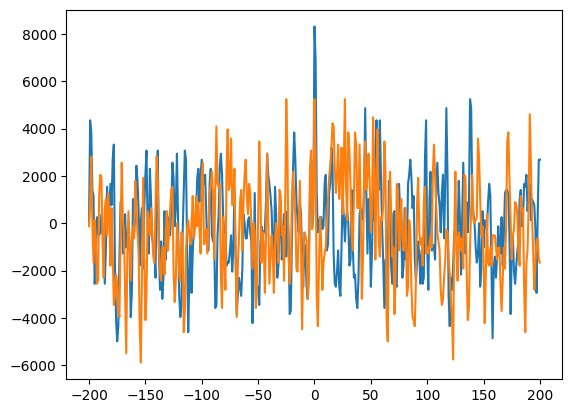

In [7]:
df = axg.select_data(df_results, freq, bits, cn0)
axg.plotSimulation(df.iloc[[0, -1]], axc_mult)

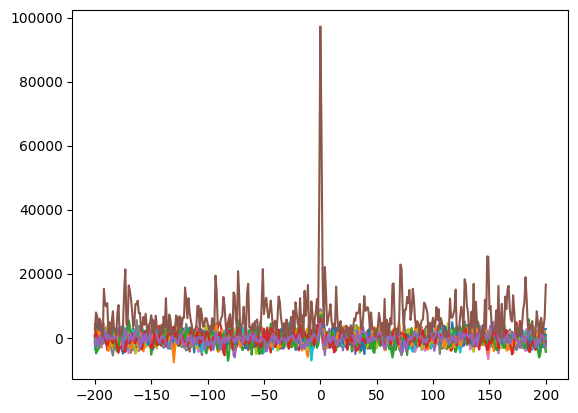

In [8]:
df = axg.select_data(df_results, freq, bits, cn0)
axg.plotCoherentCorrelation(df, axc_mult, 15)

In [9]:
sf_list = np.array([2, 4, 6, 8, 10, 16, 20]) * axg.GPS_L1CA_CODE_FREQ
cn0_list = range(20, 60, 5)
bits_list = [8, 16]
nb_run = 1000 

(-10.0, 10.0)

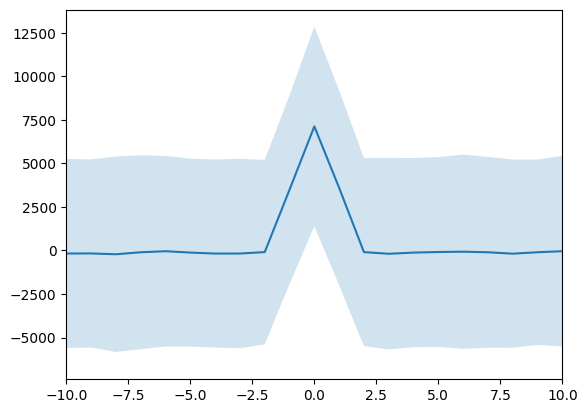

In [10]:
mean = np.mean(np.vstack(df[f'axc_corr_mul8s_1L12'].to_numpy()), axis=0)
std = 3*np.std(np.vstack(df[f'axc_corr_mul8s_1L12'].to_numpy()), axis=0)
x = range(-200, 201, 1)

plt.plot(x, mean)
plt.fill_between(x, mean-std, mean+std, alpha=0.2)
plt.xlim(-10,10)

In [11]:
# Extract statistics
df = {}
for sf in sf_list:
    for bits in bits_list:
        if bits == 8:
            axc_mults = axg.EAL_MULTIPLIERS_8BIT_SIGNED
        elif bits == 12:
            axc_mults = axg.EAL_MULTIPLIERS_12BIT_SIGNED
        elif bits == 16:
            axc_mults = axg.EAL_MULTIPLIERS_16BIT_SIGNED
        else:
            raise ValueError("Invalid quantization provided.")
        for cn0 in cn0_list:
            _df = axg.select_data(df_results, sf, bits, cn0)
            for name, axc_mult in axc_mults.items():
                mean = _df[f'axc_corr_{name}']



## Analysis of the post correlation SNR

In [18]:
cn0_range = range(30, 60, 5)

In [164]:
import re
re.sub('mul\d+s_', '', 'mul16s_1KV6')

'1KV6'

### 8 bits

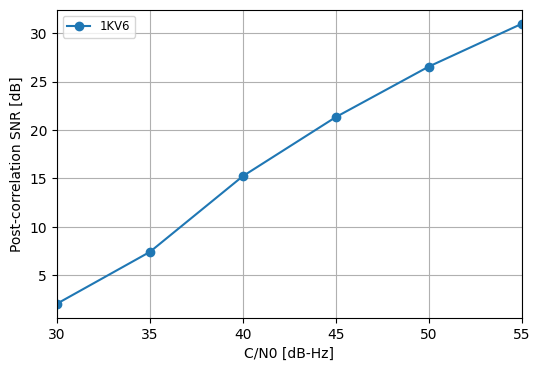

In [166]:
axg.plotPostCorrelationSNRPerFrequency(df_results, 
                                       ['mul8s_1KV6'], 
                                       cn0_range, np.array([2,4,6,8,10,20]) * axg.GPS_L1CA_CODE_FREQ, 8)
#plt.ylim(0, 35)

(0.0, 35.0)

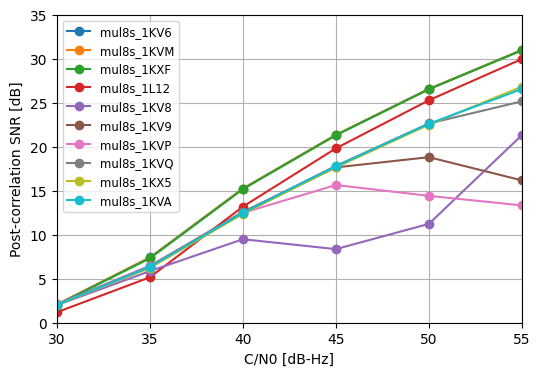

In [151]:
axg.plotPostCorrelationSNRPerFrequency(df_results, 
                                       list(axg.EAL_MULTIPLIERS_8BIT_SIGNED.keys()), #['mul8s_1L12', 'mul8s_1KVA', 'mul8s_1KV6'], 
                                       cn0_range, np.array([2,4,6,8,10,20]) * axg.GPS_L1CA_CODE_FREQ, 8)
plt.ylim(0, 35)

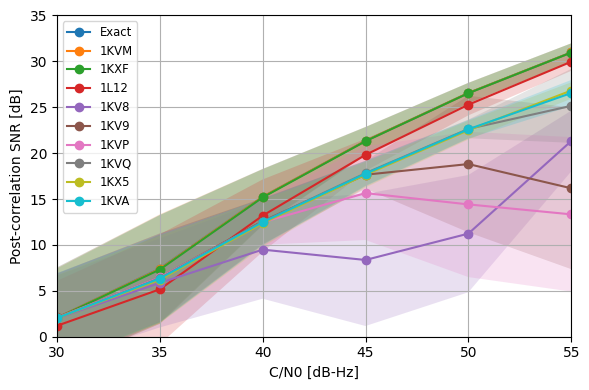

In [172]:
axg.plotPostCorrelationSNRPerFrequency(df_results, 
                                       list(axg.EAL_MULTIPLIERS_8BIT_SIGNED.keys()),
                                       cn0_range, np.array([2,4,6,8,10,20]) * axg.GPS_L1CA_CODE_FREQ, 8, errors='between')
plt.ylim(0, 35)
plt.tight_layout()
plt.savefig(f'{folder_path}/Figures/snr_8bits_all.png', dpi=300)

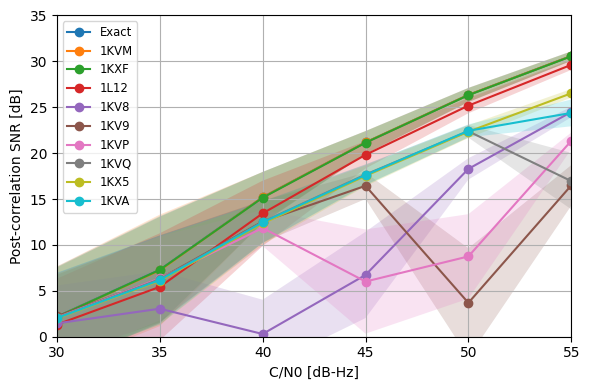

In [171]:
axg.plotPostCorrelationSNRPerFrequency(df_results, 
                                       list(axg.EAL_MULTIPLIERS_8BIT_SIGNED.keys()),
                                       cn0_range, np.array([2]) * axg.GPS_L1CA_CODE_FREQ, 8, errors='between')
plt.ylim(0, 35)
plt.tight_layout()
plt.savefig(f'{folder_path}/Figures/snr_8bits_2MHz.png', dpi=300)

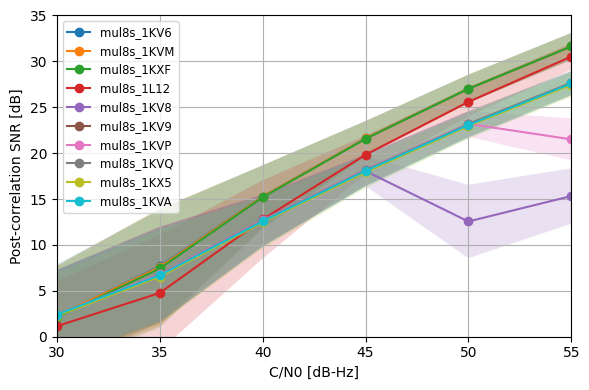

In [154]:
axg.plotPostCorrelationSNRPerFrequency(df_results, 
                                       list(axg.EAL_MULTIPLIERS_8BIT_SIGNED.keys()),
                                       cn0_range, np.array([20]) * axg.GPS_L1CA_CODE_FREQ, 8, errors='between')
plt.ylim(0, 35)
plt.tight_layout()
plt.savefig(f'{folder_path}/Figures/snr_8bits_20MHz.png', dpi=300)

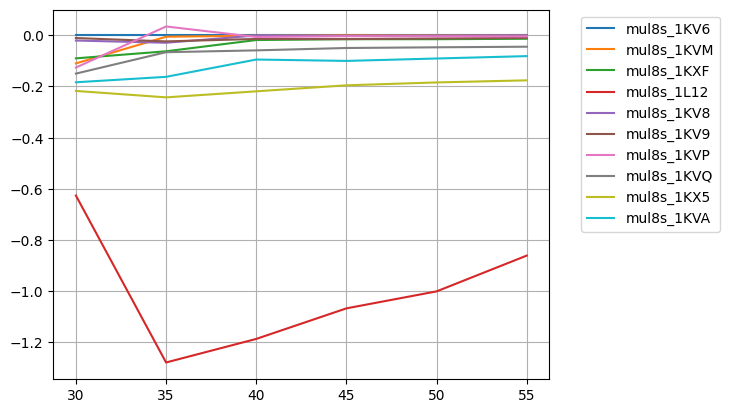

In [155]:
axg.plotPostCorrelationSNRPerAxC(df_results, cn0_range, 2 * axg.GPS_L1CA_CODE_FREQ, 8)

In [156]:
#axg.plotPostCorrelationSNRPerAxC(df_results, cn0_range, 20 * axg.GPS_L1CA_CODE_FREQ, 8)

### 16 bits

(0.0, 35.0)

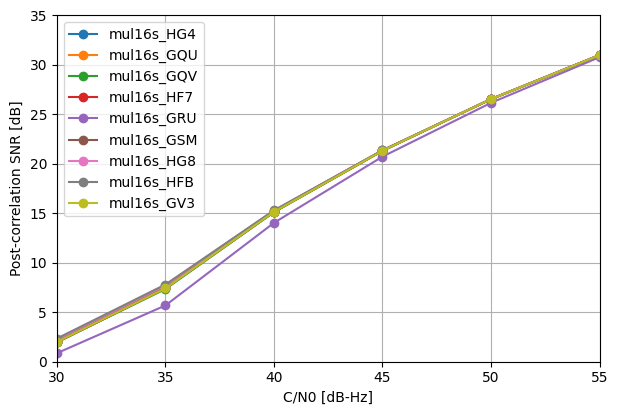

In [128]:
axg.plotPostCorrelationSNRPerFrequency(df_results, 
                                       list(axg.EAL_MULTIPLIERS_16BIT_SIGNED.keys()),
                                       cn0_range, np.array([2,4,6,8,10,20]) * axg.GPS_L1CA_CODE_FREQ, 16)
plt.ylim(0, 35)


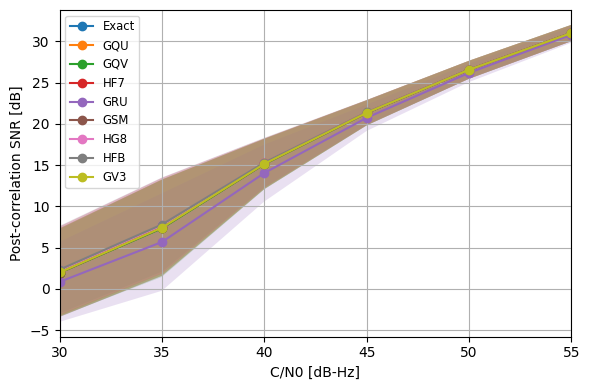

In [173]:
axg.plotPostCorrelationSNRPerFrequency(df_results, 
                                       list(axg.EAL_MULTIPLIERS_16BIT_SIGNED.keys()),
                                       cn0_range, np.array([2,4,6,8,10,20]) * axg.GPS_L1CA_CODE_FREQ, 16, errors='between')
plt.tight_layout()
plt.savefig(f'{folder_path}/Figures/snr_16bits_all.png', dpi=300)

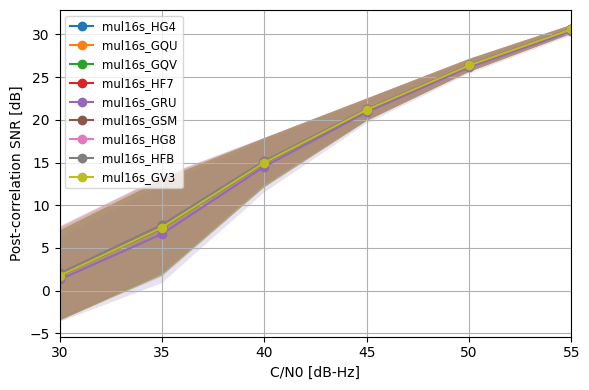

In [149]:
axg.plotPostCorrelationSNRPerFrequency(df_results, 
                                       list(axg.EAL_MULTIPLIERS_16BIT_SIGNED.keys()),
                                       cn0_range, np.array([2]) * axg.GPS_L1CA_CODE_FREQ, 16, errors='between')
plt.tight_layout()
plt.savefig(f'{folder_path}/Figures/snr_16bits_2MHz.png', dpi=300)

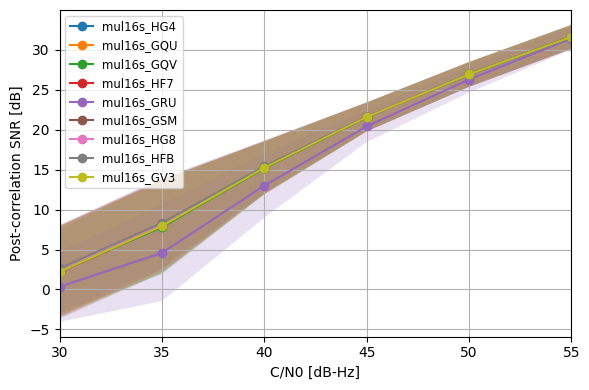

In [146]:
axg.plotPostCorrelationSNRPerFrequency(df_results, 
                                       list(axg.EAL_MULTIPLIERS_16BIT_SIGNED.keys()),
                                       cn0_range, np.array([20]) * axg.GPS_L1CA_CODE_FREQ, 16, errors='between')
plt.tight_layout()
plt.savefig(f'{folder_path}/Figures/snr_16bits_20MHz.png', dpi=300)

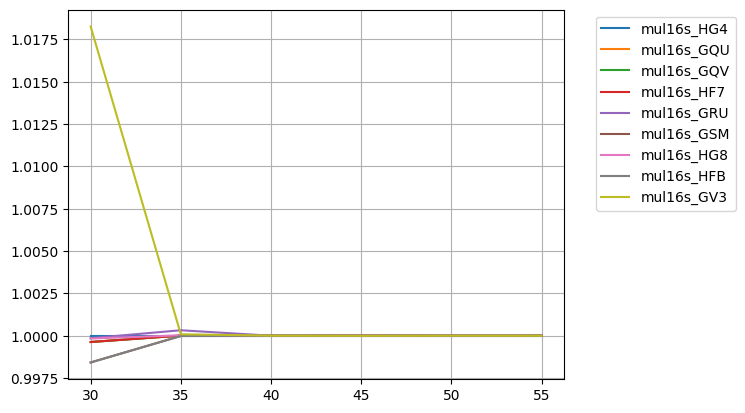

In [21]:
axg.plotPostCorrelationSNRPerAxC(df_results, cn0_range, 2 * axg.GPS_L1CA_CODE_FREQ, 16)

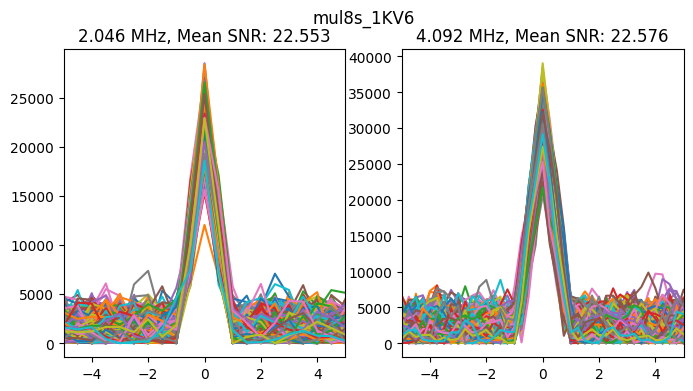

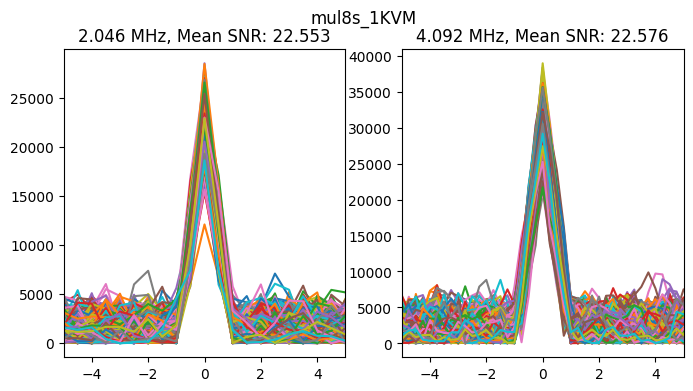

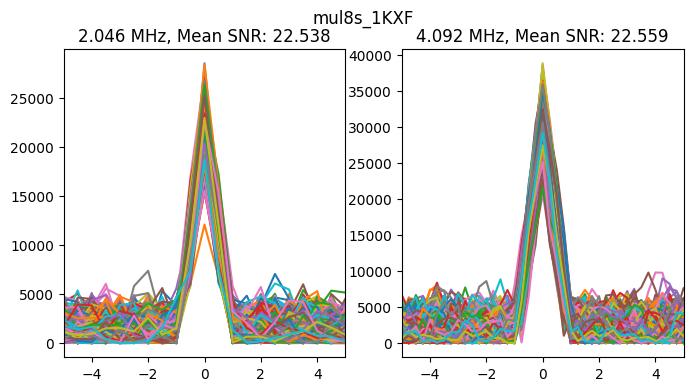

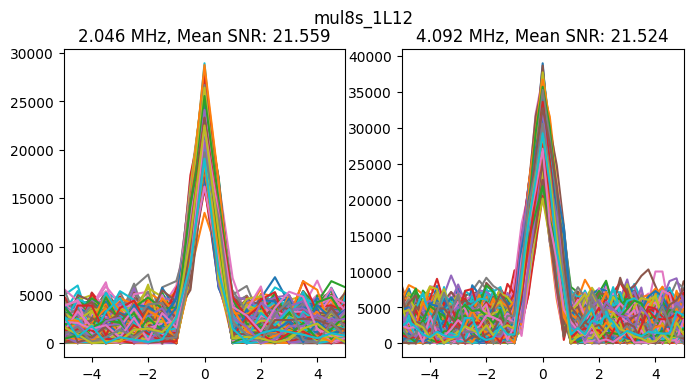

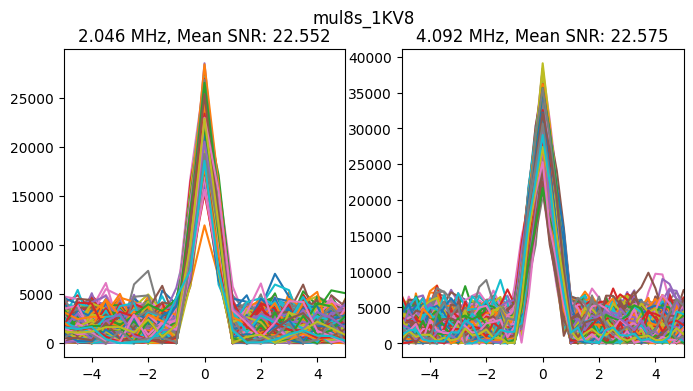

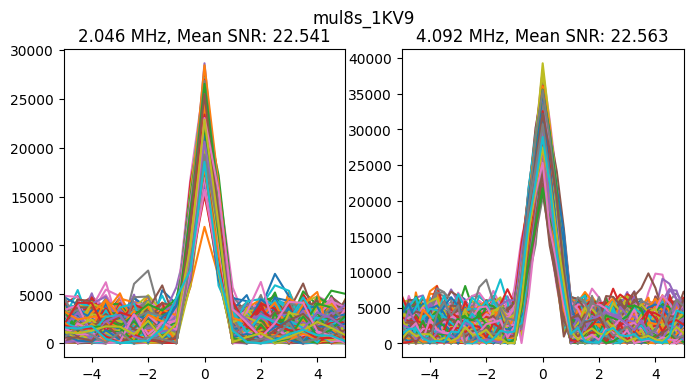

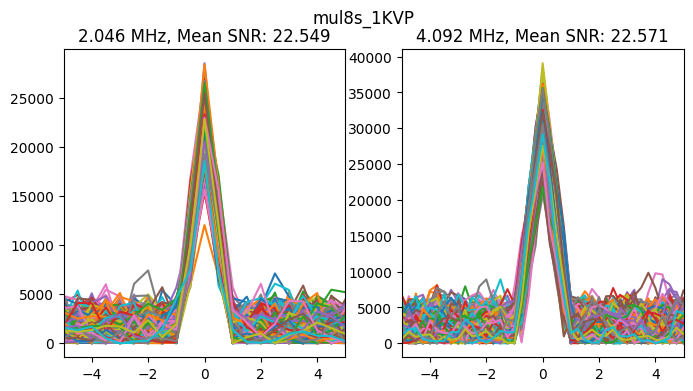

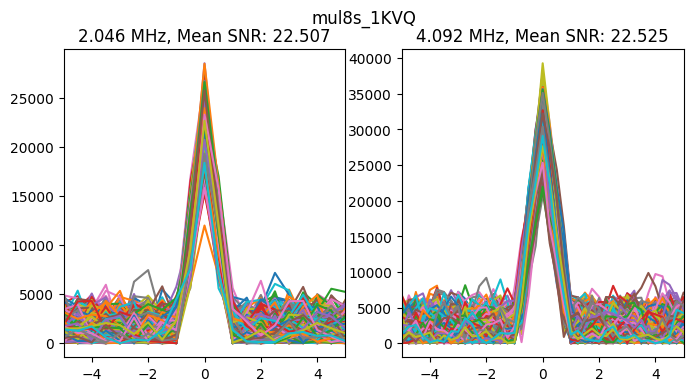

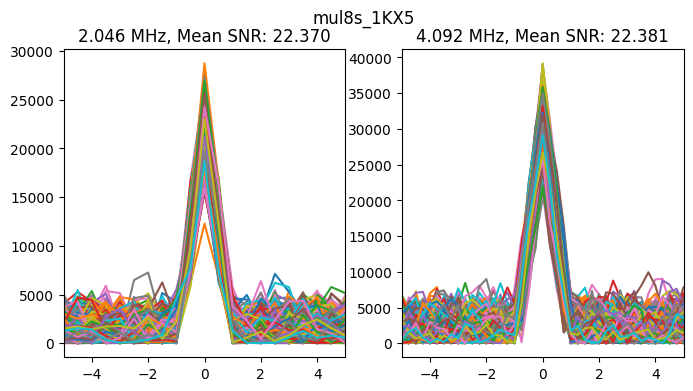

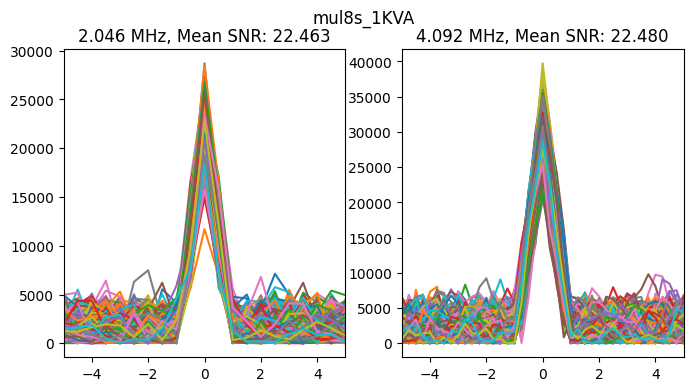

In [22]:
axc_mult_list = list(axg.EAL_MULTIPLIERS_8BIT_SIGNED.keys())
sf_list = np.array([2, 4]) * axg.GPS_L1CA_CODE_FREQ
cn0 = 50
idx_peak = 200
correction_axc = True

for axc_mult in axc_mult_list:
    fig, axs = plt.subplots(1,2, figsize=(8, 4), facecolor='w', edgecolor='k')
    fig.suptitle(axc_mult)
    i = 0
    for sf in sf_list:
        samplesPerChip = round(sf / axg.GPS_L1CA_CODE_FREQ)
        df = axg.select_data(df_results, sf, 8, cn0)
        snr = []
        for index, row in df.iterrows():
            # corr = np.abs(row[f'axc_corr_{axc_mult}'])
            corr = row[f'axc_corr_{axc_mult}']

            # Correct correlation to center around the zero and get absolute values
            if correction_axc:
                mask = np.ones(len(corr), dtype=bool)
                mask[:idx_peak-2*samplesPerChip] = False
                mask[idx_peak+2*samplesPerChip:] = False
                mean = np.mean(corr[~mask])
                corr = np.abs(corr - mean)

            corr_lags = np.arange(-row['delay_range'], row['delay_range']+1, row['delay_step'])
            axs[i].plot(corr_lags/samplesPerChip, corr)
            snr.append(axg.getPostCorrelationSNR(corr, sf, idxPeak=200))
        snr = np.array(snr)
        axs[i].set_xlim((-5,5))
        axs[i].set_title(f"{sf/1e6:.3f} MHz, Mean SNR: {snr.mean():.3f}")
        i += 1
    